In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(['math score'],axis=1)

In [5]:
y = df['math score']

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [8]:
col = df.columns
def check(df):
    for i in col:
        print(i)
        print(df[i].unique())

check(df)

gender
['female' 'male']
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch
['standard' 'free/reduced']
test preparation course
['none' 'completed']
math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score
[ 74  88  93  44  75  78  92 

In [9]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

cat_col = X.select_dtypes(include = 'object').columns
num_col = X.select_dtypes(exclude = 'object').columns

In [10]:
numeric_trans = StandardScaler()
oh_trans = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder " , oh_trans,cat_col),
        ("SandardScaler " , numeric_trans,num_col),

    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
df.shape

(1000, 8)

In [14]:
X.shape

(1000, 19)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [16]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true,predicted)
    return mae,rmse,r2

In [17]:
models={
    "LinearRegression" : LinearRegression(),
    "Lasso" :Lasso(),
    "Ridge" :Ridge(),
    "K-NeighborsRegressor" :KNeighborsRegressor(),
    "DecisionTreeRegressor" :DecisionTreeRegressor(),
    "LRandomForestRegressor" :RandomForestRegressor(),
    "XGBRegressor" :XGBRegressor(),
    "CatBoostRegressor" :CatBoostRegressor(verbose=False),
    "AdaBoostRegressor" :AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred_t = model.predict(X_train)
    y_pred = model.predict(X_test)

    model_list.append(list(models)[i])

    train_mae,train_rmse,train_r2 = evaluate_model(y_train,y_pred_t)
    test_mae,test_rmse,test_r2 = evaluate_model(y_test,y_pred)

    print("\n",list(models)[i])
    print("=============================")
    print("Train")
    print("---------")
    print("mae: {:.4f}".format(train_mae))
    print("rmse: {:.4f}".format(train_rmse))
    print("r2: {:.4f}".format(train_r2))
    print("Test")
    print("---------")
    print("mae: {:.4f}".format(test_mae))
    print("nrmse: {:.4f}".format(test_rmse))
    print("r2: {:.4f}".format(test_r2))

    r2_list.append(test_r2)






 LinearRegression
Train
---------
mae: 4.2788
rmse: 5.3274
r2: 0.8741
Test
---------
mae: 4.2259
nrmse: 5.4096
r2: 0.8797

 Lasso
Train
---------
mae: 5.2063
rmse: 6.5938
r2: 0.8071
Test
---------
mae: 5.1579
nrmse: 6.5197
r2: 0.8253

 Ridge
Train
---------
mae: 4.2650
rmse: 5.3233
r2: 0.8743
Test
---------
mae: 4.2111
nrmse: 5.3904
r2: 0.8806

 K-NeighborsRegressor
Train
---------
mae: 4.5187
rmse: 5.7122
r2: 0.8553
Test
---------
mae: 5.6160
nrmse: 7.2516
r2: 0.7839

 DecisionTreeRegressor
Train
---------
mae: 0.0187
rmse: 0.2795
r2: 0.9997
Test
---------
mae: 6.1550
nrmse: 7.8022
r2: 0.7498

 LRandomForestRegressor
Train
---------
mae: 1.8272
rmse: 2.2976
r2: 0.9766
Test
---------
mae: 4.7330
nrmse: 6.0790
r2: 0.8481

 XGBRegressor
Train
---------
mae: 0.6875
rmse: 1.0073
r2: 0.9955
Test
---------
mae: 5.0577
nrmse: 6.4733
r2: 0.8278

 CatBoostRegressor
Train
---------
mae: 2.4054
rmse: 3.0427
r2: 0.9589
Test
---------
mae: 4.6125
nrmse: 6.0086
r2: 0.8516

 AdaBoostRegressor
Train


In [18]:
pd.DataFrame(list(zip(model_list,r2_list)),columns = ['Model used','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model used,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879740
8,AdaBoostRegressor,0.852293
7,CatBoostRegressor,0.851632
5,LRandomForestRegressor,0.848138
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-NeighborsRegressor,0.783898
4,DecisionTreeRegressor,0.749834


RIDGE REGRESSION

In [19]:
regg = Ridge(fit_intercept=True)
regg = regg.fit(X_train,y_train)
y_predd = regg.predict(X_test)
score= r2_score(y_test,y_predd)
print("Accuracy : {:.2f}".format(score))

Accuracy : 0.88


Predicted V/S Actual

Text(0, 0.5, 'Predicted')

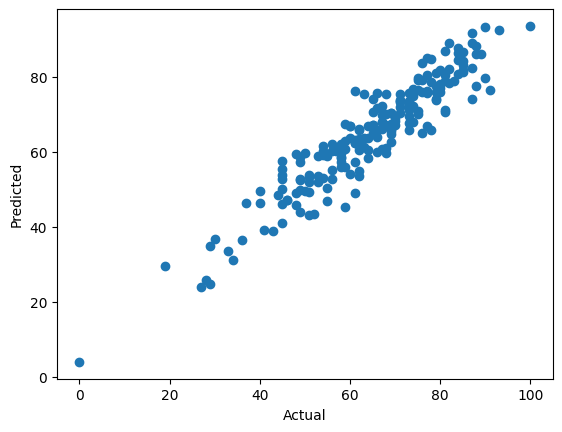

In [20]:
plt.scatter(y_test,y_predd)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

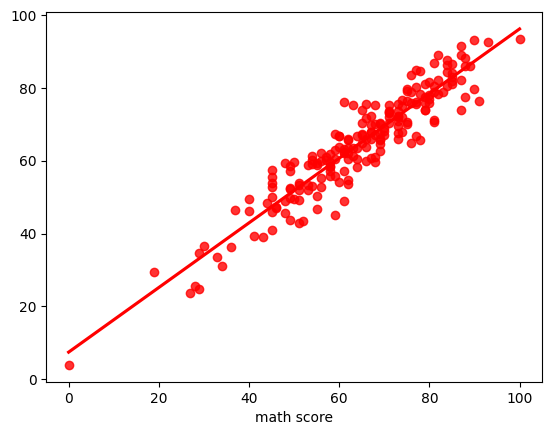

In [21]:
sns.regplot(x= y_test,y = y_predd,ci = None,color ='red')

In [22]:
pred_df = pd.DataFrame({"Actual":y_test,"Predicted":y_predd,"Difference":y_test-y_predd})
pred_df

,Actual,Predicted,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
